<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/ClassifierFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os

#Set if running locally or in Google Col}aboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/CNN_Classifier/scripts'
    Base_path = 'CNN_Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

%load_ext autoreload
%autoreload 2


from CNN_Model import *
from DataVisualization import *
from Genotype import *
from HyperparameterTuning import *
from Predictions import *
from Setup import *
#from run import *



['C:\\Users\\Kaleem\\EPFL\\ZebrafishProject\\Git\\ZebrafishClassifier/CNN_Classifier/scripts', 'c:\\nrn\\lib\\python', 'C:\\nrn\\bin', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', '', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'c:\\users\\kaleem\\epfl\\spring 2019\\fundamentals of neuroengineering\\exercises\\exercise 2 neuron\\fne-neuron-exercise', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']


In [2]:
Paths = setupEnvironment(Base_path,'Data4types.zip')

In [4]:
Genotypes = createGenotypes(Paths)

4


147
30
75
134
Instructions for updating:
Colocations handled automatically by placer.
Found 84 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
4/4 [==============================] - 2s 600ms/step - loss: 0.5606 - acc: 0.7500
 - 8s - loss: 0.5835 - acc: 0.7500 - val_loss: 0.5606 - val_acc: 0.7500
Epoch 2/2
4/4 [==============================] - 2s 543ms/step - loss: 0.5471 - acc: 0.7500
 - 6s - loss: 0.5584 - acc: 0.7500 - val_loss: 0.5471 - val_acc: 0.7500
Found 120 images belonging to 2 classes.
120/120 [==============================] - 9s 71ms/step


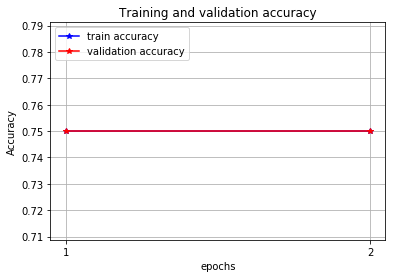

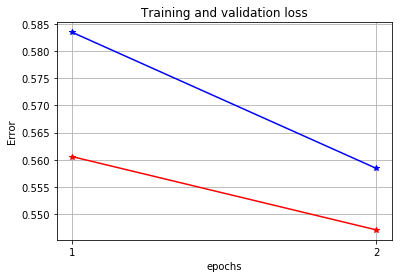

In [5]:
Tuning = False
if Tuning:

    #These are the hyperparameters tested
    #learning_rates = np.logspace(-7, -2, 7)
    #hidden_nodes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
    #input_sizes = [[75,750],[75,375], [75,150], [75,75], [50,50]]
    dropout = np.linspace(0.1, 0.5, 5)
    Plot_Xlabel = 'Dropout Rate'
    
    
    Parameters = setParameters(Paths, shapeY = 50, shapeX = 50,
                                    dropout_rate = 0,
                                    LR = 0.0001,
                                    num_nodes = 256,
                                    VGG16 = True,
                                    Dropout = False)
    Hyperparameters,Losses = Hyperparameter_tuning(Paths,
                                                   Genotypes,
                                                   Parameters,
                                                   Hyperparameter = dropout,
                                                   epochs = 3,
                                                   k_fold = 2)
    
    cross_validation_visualization(Hyperparameters,Losses[0], Losses[1],Losses[2], Losses[3],Plot_Xlabel)

else:
    #Partition data into training and test set
    createTrain_Test(Genotypes,training_size = 0.7, fixed = True)
    
    Parameters = setParameters(Paths,
                               shapeY = 50, shapeX = 50,
                               dropout_rate = 0,
                               LR = 0.0001,
                               num_nodes = 256,
                               VGG16 = True,
                               Dropout = False)
    
    Hist,Mdl,labels = runModel(Paths,Genotypes,Parameters,epochs=2)
    Mdl.genes = list(labels.keys())
    Mdl.save("model_1.h5")
    plot_loss_acc(Hist)
    
    
    #Format predictions to 4 decimal points
    float_formatter = lambda x: "%.4f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    #Predict Inages in prediction path and save predictions to a csv file
    predictionFiles, predictions = predictClass(Mdl,Paths, Parameters, class_mode='categorical')
    savePredictions(Paths,labels,predictions,predictionFiles,Parameters)



In [6]:
print(labels)
print(labels.keys())
a = list(labels.keys())
#a = labels.keys()
print(a[0])
print(Mdl.genes)

{'4thPhenotypePNG': 0, 'HHPNG': 1, 'WildtypePNG': 2, 'fss_tbx6PNG': 3}
dict_keys(['4thPhenotypePNG', 'HHPNG', 'WildtypePNG', 'fss_tbx6PNG'])
4thPhenotypePNG
ListWrapper(['4thPhenotypePNG', 'HHPNG', 'WildtypePNG', 'fss_tbx6PNG'])


In [7]:
print(Mdl.genes[0])

4thPhenotypePNG
